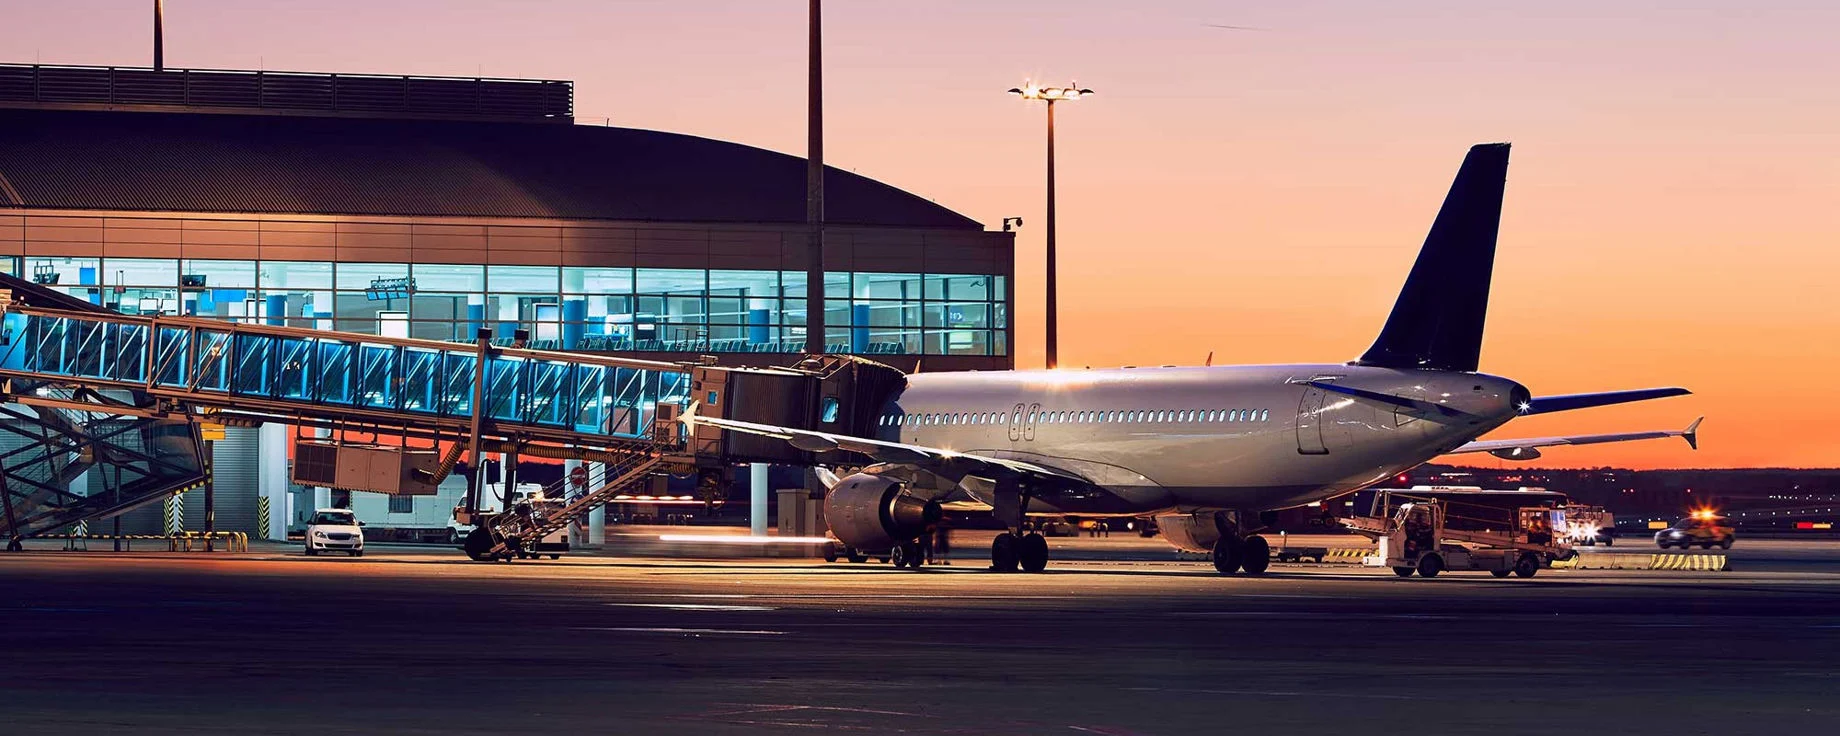

# **Introduction**

The aim of this project is to predict flight ticket prices based on various features related to flights, such as departure and arrival times, airline, source and destination cities, number of stops, and flight duration. Flight pricing is a complex task because it is influenced by multiple factors, including route popularity, travel season, and airline policies. Predicting prices accurately can help travelers make informed decisions and help travel agencies optimize their offerings.

Key steps:


1.    Data Cleaning & Preprocessing: Handle missing values, convert dates/times, encode categorical variables, and calculate flight duration in minutes.
2.    Feature Engineering: Extract features like journey day/month, departure hour, and categorize time of day.


1.    Exploratory Data Analysis: Visualize relationships between features and price, detect outliers, and understand feature importance.
2.   Modeling & Evaluation: Train regression models (Random Forest, Decision Tree), tune hyperparameters, and evaluate with R², MAE, MSE, RMSE, and MAPE.


1.    Deployment: Save the trained model using pickle for future predictions.








# Import Libraries and Load Data
Load necessary libraries for data manipulation, visualization, and analysis.

Load the training dataset and preview the first and last few rows.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.tools.datetimes import to_datetime
import warnings
from warnings import filterwarnings
filterwarnings("ignore")
import plotly
import plotly.io as pio
import plotly.express as px
import cufflinks as cf
from cufflinks.offline import go_offline
cf.set_config_file(theme=None, world_readable=True)
from plotly.offline import plot,iplot,init_notebook_mode
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
train_data=pd.read_excel(r"Data_Train.xlsx")

In [576]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [577]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Data Overview and Missing Values
Check data types, memory usage, and missing values.

Drop rows with missing data to clean the dataset.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
train_data['Total_Stops'].isnull()

,Total_Stops
0,False
1,False
2,False
3,False
4,False
...,...
10678,False
10679,False
10680,False
10681,False


In [ ]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.5 MB


In [ ]:
train_data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


# Create a Copy of the Dataset
Make a working copy to preserve the original data.

In [ ]:
data=train_data.copy()

# Convert Columns to Datetime
Convert date and time columns into datetime objects for easier feature extraction.

In [ ]:
def change_into_Datetime(col):
    data[col]=pd.to_datetime(data[col])


In [ ]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
  change_into_Datetime(feature)
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


# Extract Journey Day, Month, and Year
Extract day, month, and year from the journey date to create numerical features.

In [ ]:
data['Journey_Day']=data['Date_of_Journey'].dt.day

In [ ]:
data['Journey_Month']=data['Date_of_Journey'].dt.month

In [ ]:
data['Journey_Year']=data['Date_of_Journey'].dt.year

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-24 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-24 05:50:00,2025-11-24 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-24 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-11-24 18:05:00,2025-11-24 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-11-24 16:50:00,2025-11-24 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


# Extract Hours and Minutes from Departure and Arrival Times
Split datetime columns into separate hour and minute features.

In [ ]:
def extract_hour_min(df,col):
  df[col+"_hour"]=df[col].dt.hour
  df[col+"_minute"]=df[col].dt.minute
  return df.head(3)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year'],
      dtype='object')

In [ ]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-24 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-24 05:50:00,2025-11-24 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-24 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [ ]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-24 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-24 05:50:00,2025-11-24 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-24 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


# Dropping Original Time Columns
Remove columns no longer needed after feature extraction.  

In [ ]:
cols_to_drop={"Arrival_Time","Dep_Time"}
data.drop(cols_to_drop,axis=1,inplace=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


# Categorize Departure Time of Day
Group flights into time-of-day categories based on departure hour and plot a bar chart.

In [ ]:
def flight_dep_time(x):
  if(x>4 and x<=8):
    return "Early Morning"
  elif(x>8 and x<=12):
    return "Morning"
  elif(x>12 and x<=16):
    return "Noon"
  elif(x>16 and x<=20):
    return "Evening"
  elif(x>20 and x<=24):
    return "Night"
  else:
    return "Late Night"


<Axes: xlabel='Dep_Time_hour'>

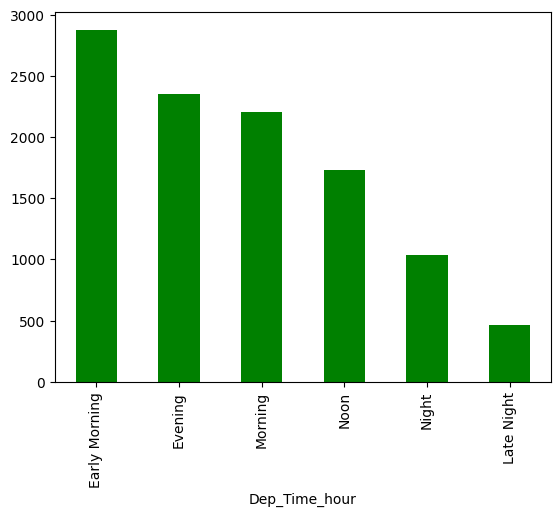

In [ ]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color="green")


# Interactive Visualization with Plotly and Cufflinks
Create an interactive bar chart of flights by departure time using Plotly.

In [ ]:
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
pio.renderers.default = "colab"
vc = data['Dep_Time_hour'].apply(flight_dep_time).value_counts()
fig = px.bar(vc, x=vc.index, y=vc.values)
fig.show()

#  Preprocess Flight Duration
Standardize duration format and extract numeric hours and minutes for analysis.

In [ ]:
def preprocess_duration(x):
  if "h" not in x:
    x="0h"+" "+x
  elif "m" not in x:
    x=x+" "+"0m"
  return x

In [ ]:
data["Duration"]=data["Duration"].apply(preprocess_duration)

In [ ]:
data["Duration_hours"]=data["Duration"].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [ ]:
data["Duration_mins"]=data["Duration"].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


# Convert Duration to Total Minutes
Combine hours and minutes into a single numeric feature representing total flight duration in minutes.

In [ ]:
data["Duration_total_mins"]=data["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [ ]:
data["Duration_total_mins"]

,Duration_total_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


#  Visualize Relationship Between Duration and Price
Use scatter plots and regression plots to observe how flight duration affects price.

Include the number of stops as a hue to see its effect.

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

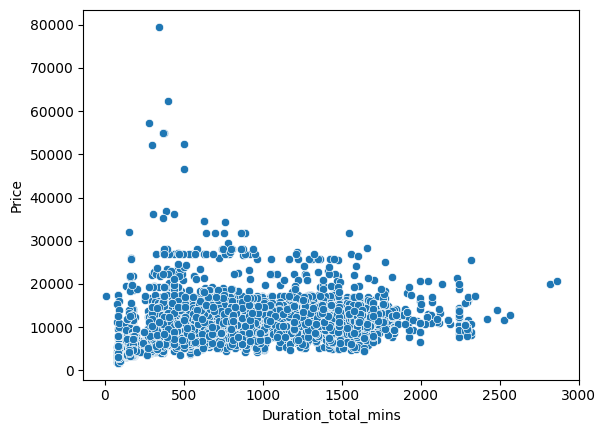

In [ ]:
sns.scatterplot(x="Duration_total_mins",y="Price",data=data)

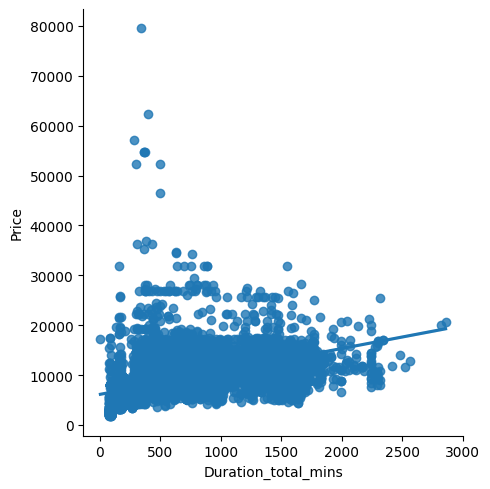

In [ ]:
sns.lmplot(x="Duration_total_mins",y="Price",data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

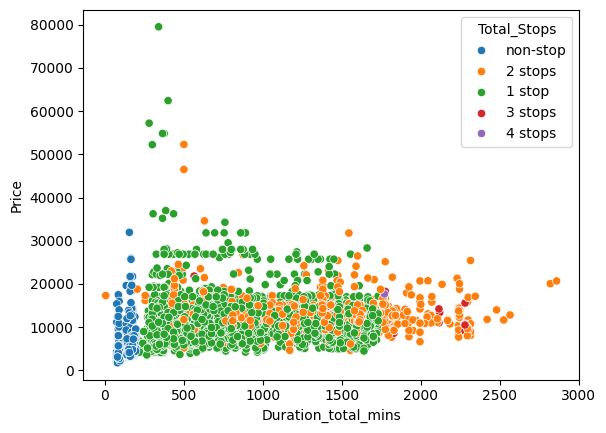

In [ ]:
sns.scatterplot(x="Duration_total_mins",y="Price",hue="Total_Stops",data=data)

# Analyze Frequent Routes for Jet Airways
Count the most common routes flown by Jet Airways.

In [ ]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
DEL → JAI → BOM → COK,207
BOM → HYD,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


# Visualize Price Distribution by Airline
Plot a boxen plot to compare price distributions across different airlines.

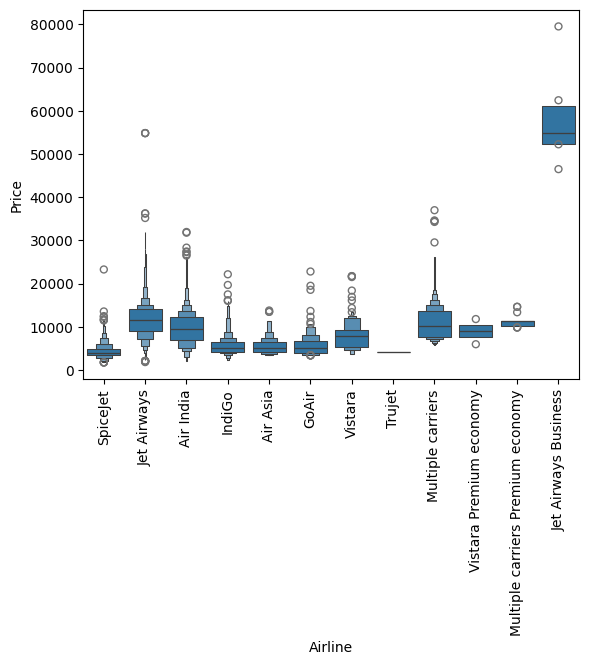

In [ ]:
sns.boxenplot(y="Price",x="Airline",data=data.sort_values("Price"))
plt.xticks(rotation="vertical")
plt.show()

# Identify Categorical and Numerical Columns
Classify features as categorical or numerical for preprocessing.

In [ ]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]

In [ ]:
num_col=[col for col in data.columns if data[col].dtype!="object"]

In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
data["Source"].apply(lambda x:1 if x=='Banglore' else 0)

,Source
0,1
1,0
2,0
3,0
4,1
...,...
10678,0
10679,0
10680,1
10681,1


# One-Hot Encode Source Column
Convert the Source column into multiple binary columns.

In [ ]:
for sub_category in data['Source'].unique():
  data["Source_"+sub_category]=data["Source"].apply(lambda x:1 if x==sub_category else 0)


In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
data['Airline'].nunique()

12

# Encode Airline Column
Map each airline to a numerical value based on average prices.

In [ ]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
data['Airline']=data['Airline'].map(dict_airlines)
data['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


# Encode Destination Column
Map destinations to numerical values and standardize names.

In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_dest={key:index for index,key in enumerate(dest,0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data['Destination']=data['Destination'].map(dict_dest)
data['Destination']

,Destination
0,2
1,3
2,4
3,3
4,2
...,...
10678,3
10679,3
10680,2
10681,2


# Encode Total Stops
Convert flight stop information into numeric format.

In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops']=data['Total_Stops'].map(stop)
data['Total_Stops']

,Total_Stops
0,0
1,2
2,2
3,1
4,1
...,...
10678,0
10679,0
10680,0
10681,0


In [ ]:
data['Additional_Info'].value_counts()/len(data)*100

,count
Additional_Info,
No info,78.112713
In-flight meal not included,18.554578
No check-in baggage included,2.995694
1 Long layover,0.177869
Change airports,0.065531
Business class,0.037446
No Info,0.028085
1 Short layover,0.009362
Red-eye flight,0.009362


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data['Journey_Year'].unique()

array([2019], dtype=int32)

# Drop Unnecessary Columns
Remove irrelevant or redundant columns from the dataset.

In [ ]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_Year','Route','Duration'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_Day',
       'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

# Exploratory Data Analysis (Price Distribution)
Visualize price distribution using histograms and boxplots.

In [ ]:
def plot(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)
  sns.distplot(df[col],ax=ax3,kde=False)

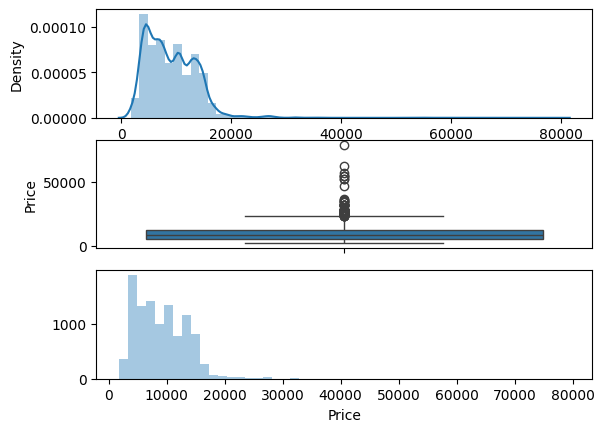

In [ ]:
plot(data,'Price')

# Outlier Detection and Handling
Detect and replace extreme price values with median to reduce skew.

In [ ]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr
print(minimum)
print(maximum)

-5367.0
23017.0


In [ ]:
print([price for price in data['Price'] if price> maximum or price<minimum])
len([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


94

In [ ]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

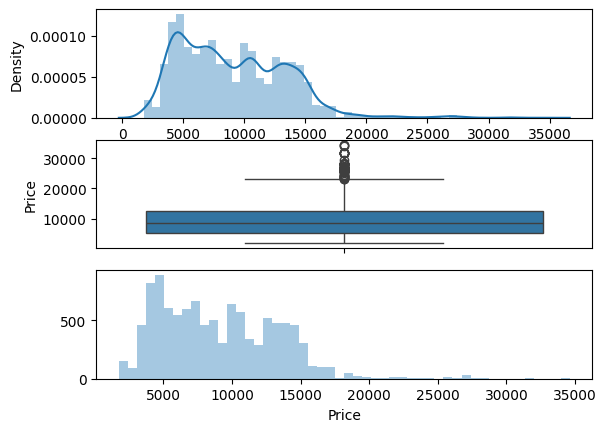

In [ ]:
plot(data,'Price')

# Feature-Target Split
Separate input features (X) and target variable (y).

In [ ]:
x=data.drop(['Price'],axis=1)

In [ ]:
y=data['Price']

# Feature Importance
Evaluate which features are most informative for predicting price.

In [ ]:
imp=mutual_info_regression(x,y)
imp

array([1.32232932, 1.06243171, 0.78815819, 0.36358477, 0.62994606,
       0.92297464, 0.74989408, 1.14261637, 0.90119591, 1.11836365,
       0.67201275, 0.3869444 , 0.45957808, 0.53001104, 0.13253693,
       0.20465766])

In [ ]:
imp_df=pd.DataFrame(imp,index=x.columns)
imp_df

,0
Airline,1.322329
Destination,1.062432
Total_Stops,0.788158
Journey_Day,0.363585
Journey_Month,0.629946
Dep_Time_hour,0.922975
Dep_Time_minute,0.749894
Arrival_Time_hour,1.142616
Arrival_Time_minute,0.901196
Duration_hours,1.118364


In [ ]:
imp_df.columns=['importance']
imp_df

,importance
Airline,1.322329
Destination,1.062432
Total_Stops,0.788158
Journey_Day,0.363585
Journey_Month,0.629946
Dep_Time_hour,0.922975
Dep_Time_minute,0.749894
Arrival_Time_hour,1.142616
Arrival_Time_minute,0.901196
Duration_hours,1.118364


In [ ]:
imp_df.sort_values(by='importance',ascending=False)

,importance
Airline,1.322329
Arrival_Time_hour,1.142616
Duration_hours,1.118364
Destination,1.062432
Dep_Time_hour,0.922975
Arrival_Time_minute,0.901196
Total_Stops,0.788158
Dep_Time_minute,0.749894
Duration_mins,0.672013
Journey_Month,0.629946


# Train-Test Split
Split data into training and testing sets for model evaluation.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

# Train Random Forest Regressor
Fit a Random Forest model to the training data.

In [ ]:
ml_model=RandomForestRegressor()

In [ ]:
ml_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=ml_model.predict(x_test)
y_pred

array([16731.78      ,  5309.88      ,  8840.54      , ...,
        8426.49      ,  9234.2       , 12331.61302381])

# Model Evaluation
Assess model performance using metrics like R², MAE, and MSE.

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8151945404514214

# Save and Load Model
Persist the trained model using pickle for future use.

In [ ]:
file=open('rf_random.pk1','wb')

In [ ]:
pickle.dump(ml_model,file)

In [ ]:
model=open('rf_random.pk1','rb')
forest=pickle.load(model)

In [ ]:
y_pred2=forest.predict(x_test)
y_pred2

array([16731.78      ,  5309.88      ,  8840.54      , ...,
        8426.49      ,  9234.2       , 12331.61302381])

In [ ]:
metrics.r2_score(y_test,y_pred2)

0.8151945404514214

# MAPE Calculation
Compute Mean Absolute Percentage Error to evaluate prediction accuracy.

In [ ]:
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  mask = y_true != 0
  return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


In [ ]:
float(mape(y_test,y_pred))

13.267543558247871

# Predict Function for Any Model
Reusable function to train, predict, and evaluate any regression model.

In [ ]:
def predict(ml_model):
  model=ml_model.fit(x_train,y_train)
  print('Training score:{}'.format(model.score(x_train,y_train)))
  y_prediction=model.predict(x_test)
  print('Predictions are: {}'.format(y_prediction))
  print('\n')
  r2_score=metrics.r2_score(y_test,y_prediction)
  print('r2 score:{}'.format(r2_score))
  print('MAE:{}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
  print('MSE:{}'.format(metrics.mean_squared_error(y_test,y_prediction)))
  print('RMSE:{}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
  print('MAPE:{}'.format(mape(y_test,y_prediction)))
  sns.distplot(y_test-y_prediction)


# Test with Random Forest and Decision Tree
Compare performance of different regression algorithms.

Training score:0.9531525457370699
Predictions are: [16762.44        5196.97        8972.34       ...  8313.66
  9263.67       12004.39683333]


r2 score:0.818467466912115
MAE:1165.368432358898
MSE:3486099.984166755
RMSE:1867.1100621459773
MAPE:13.129302313704446


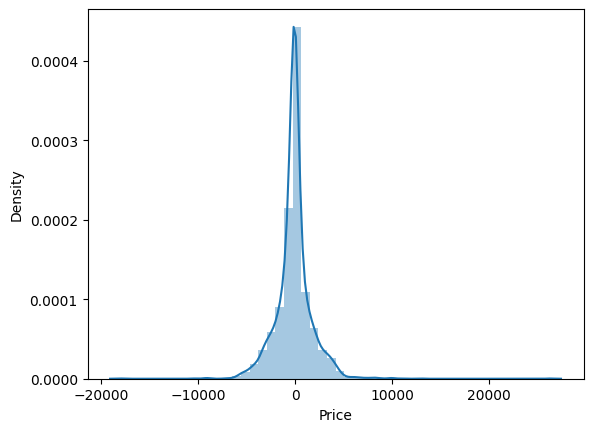

In [ ]:
predict(RandomForestRegressor())

Training score:0.9696998040730191
Predictions are: [16840.   4959.   8085.  ...  6442.  10141.  11652.5]


r2 score:0.6947905337323128
MAE:1396.8046700699565
MSE:5861157.212014558
RMSE:2420.982695521502
MAPE:15.495587660302482


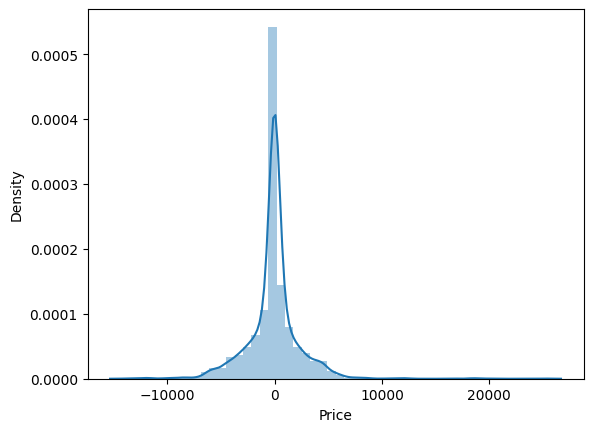

In [ ]:
predict(DecisionTreeRegressor())

# Hyperparameter Tuning with RandomizedSearchCV
Optimize Random Forest parameters to improve model accuracy.

In [ ]:
reg_rf=RandomForestRegressor()

In [ ]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5,
                      n_estimators=760)

In [ ]:
rf_random.best_score_

np.float64(0.798243933466321)